In [4]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
cd_2016 = pd.read_csv('KCPD_Crime_Data_2016_numeric.csv')
cd_2016.head()

,Report_No,From_Date,From_Time,Offense,Zip Code,DVFlag,Race,Sex,Firearm Used Flag
0,100034831,10/18/2016,0.86,1352,64130,U,B,M,N
1,120027507,10/25/2016,0.58,1352,64130,U,NaN,NaN,N
2,120084496,5/28/2016,0.98,1352,64128,N,B,M,N
3,130056370,7/3/2016,0.97,1849,64133,U,NaN,NaN,N
4,130056370,7/3/2016,0.97,1849,64133,U,B,M,N


In [6]:
data_cleaning = cd_2016.dropna()
data_cleaning.head()

,Report_No,From_Date,From_Time,Offense,Zip Code,DVFlag,Race,Sex,Firearm Used Flag
0,100034831,10/18/2016,0.86,1352,64130,U,B,M,N
2,120084496,5/28/2016,0.98,1352,64128,N,B,M,N
4,130056370,7/3/2016,0.97,1849,64133,U,B,M,N
7,130091019,8/4/2016,0.58,2601,64134,U,W,M,N
8,130091019,8/4/2016,0.58,2601,64134,U,B,M,N


In [7]:
data_cleaning.dtypes

Report_No              int64
From_Date             object
From_Time            float64
Offense                int64
Zip Code               int64
DVFlag                object
Race                  object
Sex                   object
Firearm Used Flag     object
dtype: object

In [17]:
sex_encoded = pd.get_dummies(data_cleaning, columns=["Sex"])
sex_encoded.head()

,Report_No,From_Date,From_Time,Offense,Zip Code,DVFlag,Race,Firearm Used Flag,Sex_F,Sex_M,Sex_U
0,100034831,10/18/2016,0.86,1352,64130,U,B,N,0,1,0
2,120084496,5/28/2016,0.98,1352,64128,N,B,N,0,1,0
4,130056370,7/3/2016,0.97,1849,64133,U,B,N,0,1,0
7,130091019,8/4/2016,0.58,2601,64134,U,W,N,0,1,0
8,130091019,8/4/2016,0.58,2601,64134,U,B,N,0,1,0


In [18]:
DV_encoded = pd.get_dummies(sex_encoded, columns=["DVFlag"])
DV_encoded.head()

,Report_No,From_Date,From_Time,Offense,Zip Code,Race,Firearm Used Flag,Sex_F,Sex_M,Sex_U,DVFlag_N,DVFlag_U,DVFlag_Y
0,100034831,10/18/2016,0.86,1352,64130,B,N,0,1,0,0,1,0
2,120084496,5/28/2016,0.98,1352,64128,B,N,0,1,0,1,0,0
4,130056370,7/3/2016,0.97,1849,64133,B,N,0,1,0,0,1,0
7,130091019,8/4/2016,0.58,2601,64134,W,N,0,1,0,0,1,0
8,130091019,8/4/2016,0.58,2601,64134,B,N,0,1,0,0,1,0


In [19]:
F_encoded = pd.get_dummies(DV_encoded, columns=["Firearm Used Flag"])
F_encoded.head()

,Report_No,From_Date,From_Time,Offense,Zip Code,Race,Sex_F,Sex_M,Sex_U,DVFlag_N,DVFlag_U,DVFlag_Y,Firearm Used Flag_N,Firearm Used Flag_Y
0,100034831,10/18/2016,0.86,1352,64130,B,0,1,0,0,1,0,1,0
2,120084496,5/28/2016,0.98,1352,64128,B,0,1,0,1,0,0,1,0
4,130056370,7/3/2016,0.97,1849,64133,B,0,1,0,0,1,0,1,0
7,130091019,8/4/2016,0.58,2601,64134,W,0,1,0,0,1,0,1,0
8,130091019,8/4/2016,0.58,2601,64134,B,0,1,0,0,1,0,1,0


In [20]:
R_encoded = pd.get_dummies(F_encoded, columns=["Race"])
R_encoded.head()

,Report_No,From_Date,From_Time,Offense,Zip Code,Sex_F,Sex_M,Sex_U,DVFlag_N,DVFlag_U,DVFlag_Y,Firearm Used Flag_N,Firearm Used Flag_Y,Race_A,Race_B,Race_I,Race_P,Race_U,Race_W
0,100034831,10/18/2016,0.86,1352,64130,0,1,0,0,1,0,1,0,0,1,0,0,0,0
2,120084496,5/28/2016,0.98,1352,64128,0,1,0,1,0,0,1,0,0,1,0,0,0,0
4,130056370,7/3/2016,0.97,1849,64133,0,1,0,0,1,0,1,0,0,1,0,0,0,0
7,130091019,8/4/2016,0.58,2601,64134,0,1,0,0,1,0,1,0,0,0,0,0,0,1
8,130091019,8/4/2016,0.58,2601,64134,0,1,0,0,1,0,1,0,0,1,0,0,0,0


In [21]:
df_2016 = pd.DataFrame(R_encoded)
df_2016.dtypes

Report_No                int64
From_Date               object
From_Time              float64
Offense                  int64
Zip Code                 int64
Sex_F                    uint8
Sex_M                    uint8
Sex_U                    uint8
DVFlag_N                 uint8
DVFlag_U                 uint8
DVFlag_Y                 uint8
Firearm Used Flag_N      uint8
Firearm Used Flag_Y      uint8
Race_A                   uint8
Race_B                   uint8
Race_I                   uint8
Race_P                   uint8
Race_U                   uint8
Race_W                   uint8
dtype: object

In [22]:
df_2016.head()

,Report_No,From_Date,From_Time,Offense,Zip Code,Sex_F,Sex_M,Sex_U,DVFlag_N,DVFlag_U,DVFlag_Y,Firearm Used Flag_N,Firearm Used Flag_Y,Race_A,Race_B,Race_I,Race_P,Race_U,Race_W
0,100034831,10/18/2016,0.86,1352,64130,0,1,0,0,1,0,1,0,0,1,0,0,0,0
2,120084496,5/28/2016,0.98,1352,64128,0,1,0,1,0,0,1,0,0,1,0,0,0,0
4,130056370,7/3/2016,0.97,1849,64133,0,1,0,0,1,0,1,0,0,1,0,0,0,0
7,130091019,8/4/2016,0.58,2601,64134,0,1,0,0,1,0,1,0,0,0,0,0,0,1
8,130091019,8/4/2016,0.58,2601,64134,0,1,0,0,1,0,1,0,0,1,0,0,0,0


In [23]:
df_2016.dtypes

Report_No                int64
From_Date               object
From_Time              float64
Offense                  int64
Zip Code                 int64
Sex_F                    uint8
Sex_M                    uint8
Sex_U                    uint8
DVFlag_N                 uint8
DVFlag_U                 uint8
DVFlag_Y                 uint8
Firearm Used Flag_N      uint8
Firearm Used Flag_Y      uint8
Race_A                   uint8
Race_B                   uint8
Race_I                   uint8
Race_P                   uint8
Race_U                   uint8
Race_W                   uint8
dtype: object

In [28]:
X = df_2016["Offense"].values.reshape(-1, 1)
y = df_2016[["Sex_F", "Sex_M", "Sex_U"]]
print(X.shape, y.shape)

(109631, 1) (109631, 3)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [32]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

ValueError: x and y must be the same size

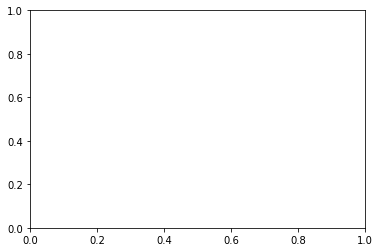

In [34]:
plt.scatter(X, y)